In [1]:
from re import split
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

/home/qiaolinhan/anaconda3/envs/dev/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370117127/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
path = Path('dev/datasets')
path_img = path/'S_kaggle_wildfire'

path_label = path/'S_kaggle_wildfire_label'
codes = ['smoke', 'flame', 'Void']

In [3]:
path_img

Path('dev/datasets/S_kaggle_wildfire')

In [4]:
fnames = get_image_files(path_img)
print(fnames[0])

dev/datasets/S_kaggle_wildfire/000366.jpg


In [5]:
lbl_names = get_image_files(path_label)
print(lbl_names[0])

dev/datasets/S_kaggle_wildfire_label/label_000373.jpg


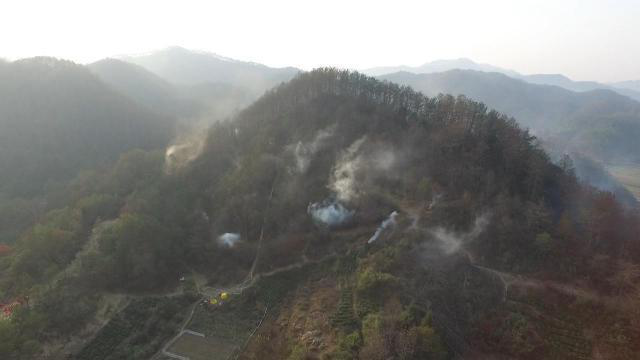

In [6]:
img = Image.open(fnames[0])
img.show()

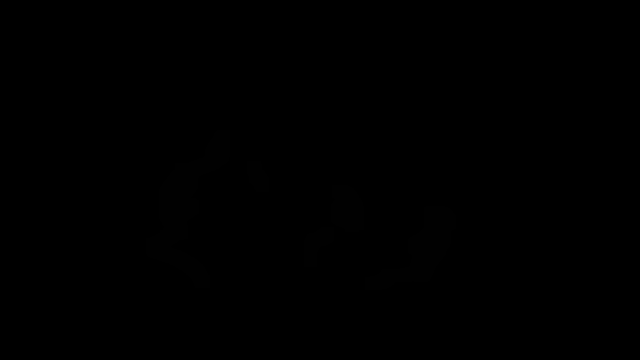

In [7]:
img = Image.open(lbl_names[0])
img.show()

In [8]:
get_y_fn = lambda x: path_label/f'label_{x.name}'
defaults.use_cuda = False

In [9]:
dls = SegmentationDataLoaders.from_label_func(
    path_img,
    bs = 1,
    fnames = fnames,
    label_func = get_y_fn,
    codes = codes,
    item_tfms = [Resize((255, 255))],
    batch_tfms = [Normalize.from_stats(*imagenet_stats)],
)

In [10]:
name2id = {v:k for k, v in enumerate(codes)}
void_code = name2id['Void']

def acc_smoke(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim = 1)[mask]==target[mask]).float().mean()

metrics = acc_smoke


In [11]:
learn = unet_learner(dls, models.resnet34, metrics = metrics,
                    self_attention=True)

In [35]:
learn.model

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

In [ ]:
learn.lr_find()

In [13]:
lr = 7.58e-5
learn.fit_one_cycle(13, slice(lr))

epoch,train_loss,valid_loss,acc_smoke,time
0,0.289464,0.248249,0.909905,00:33
1,0.185963,0.248808,0.890239,00:33
2,0.154467,0.186338,0.919106,00:33
3,0.150349,0.175401,0.918613,00:33
4,0.131554,0.159515,0.932044,00:33
5,0.118390,0.165364,0.931576,00:33
6,0.099639,0.142592,0.941093,00:33
7,0.098127,0.131726,0.943125,00:33
8,0.097108,0.132673,0.944915,00:34
9,0.084782,0.132784,0.944826,00:33


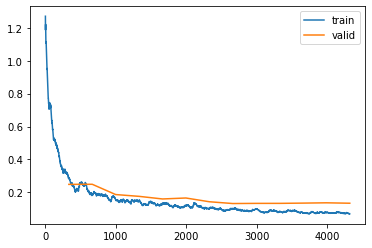

In [14]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [15]:
learn.save('stage-1')
learn.load('stage-1')

SuggestedLRs(valley=2.511886486900039e-05)

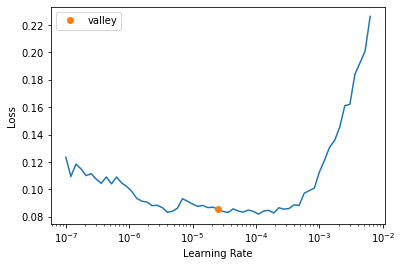

In [16]:
learn.unfreeze()
learn.lr_find()

In [17]:
lr_max = 6.3e-5

In [18]:
learn.fit_one_cycle(4, lr_max)

epoch,train_loss,valid_loss,acc_smoke,time
0,0.106644,0.140638,0.940660,00:39
1,0.103818,0.140980,0.943615,00:39
2,0.079005,0.124433,0.947679,00:39
3,0.076286,0.127162,0.948014,00:39


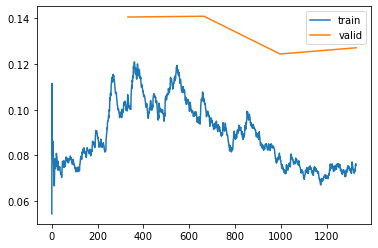

In [19]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
# learn.show_results()
# learn.save('attunet')

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

Path('datas/database/models/alunet.pth')

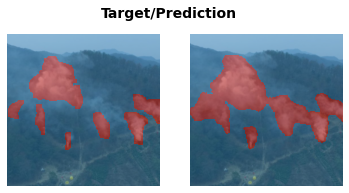

In [20]:
learn.show_results()
learn.save('alunet')

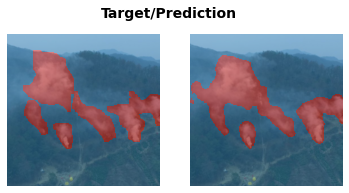

In [21]:
learn.show_results()

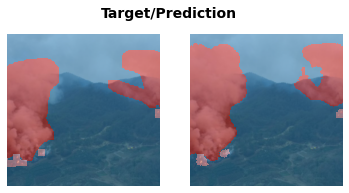

In [22]:
learn.show_results()

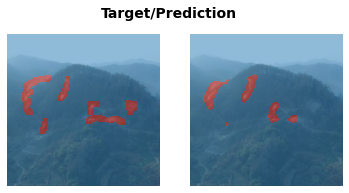

In [23]:
learn.show_results()

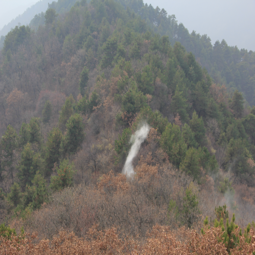

In [12]:
img = Image.open('dev/datasets/huangling/观景台拍摄/IMG_6934.JPG').resize((255, 255))
img.show()

In [13]:
img = PILImage(img)

In [14]:
learn.load('attunet')
# learn.load('attunet')

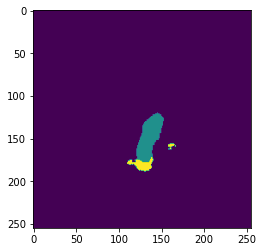

In [15]:
prediction_mask = learn.predict(img)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
plt.imshow(seg_map)

<AxesSubplot:>

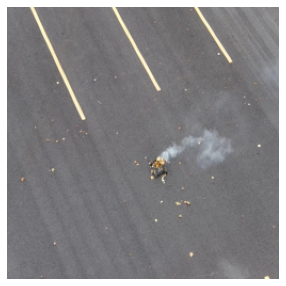

In [18]:
img = Image.open('dev/giao/datasets/bounding the masks/images/DJI_20211017111122_0003_Z_MP4_0.png').resize((255, 255))
img = PILImage(img)
img.show()

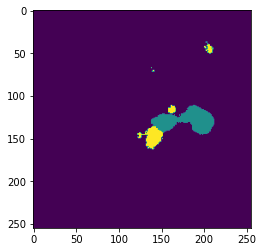

In [19]:
prediction_mask = learn.predict(img)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
plt.imshow(seg_map)

<AxesSubplot:>

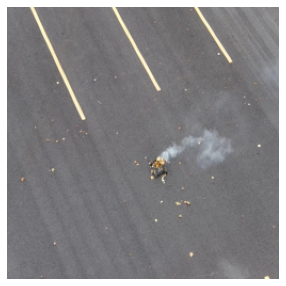

In [20]:
learn = unet_learner(dls, models.resnet34, metrics = metrics,
                    self_attention= False)

learn.load('alunet')

img = Image.open('dev/giao/datasets/bounding the masks/images/DJI_20211017111122_0003_Z_MP4_0.png').resize((255, 255))
img = PILImage(img)
img.show()

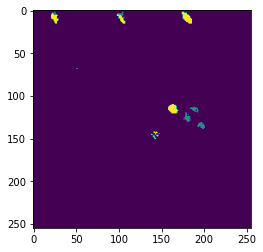

In [21]:
prediction_mask = learn.predict(img)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
plt.imshow(seg_map)

In [34]:
# test
# testing dependencies
import os
import cv2

from re import split
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from datetime import datetime
import pathlib

%matplotlib inline

In [35]:
path = Path('dev/datasets')
path_img = path/'S_kaggle_wildfire'

path_label = path/'S_kaggle_wildfire_label'
codes = ['smoke', 'flame', 'Void']

In [36]:
fnames = get_image_files(path_img)
print(fnames[0])

lbl_names = get_image_files(path_label)
print(lbl_names[0])

dev/datasets/S_kaggle_wildfire/000366.jpg
dev/datasets/S_kaggle_wildfire_label/label_000373.jpg


In [37]:
# connections between images and masks
get_y_fn = lambda x: path_label/f'label_{x.name}'
defaults.use_cuda = False

dls = SegmentationDataLoaders.from_label_func(
    path_img,
    bs = 1,
    fnames = fnames,
    label_func = get_y_fn,
    codes = codes,
    item_tfms = [Resize((400, 400))],
    batch_tfms = [Normalize.from_stats(*imagenet_stats)],
)

In [38]:
name2id = {v:k for k, v in enumerate(codes)}
void_code = name2id['Void']

def acc_smoke(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim = 1)[mask]==target[mask]).float().mean()

metrics = acc_smoke

In [39]:
learn = unet_learner(dls, models.resnet34, metrics = metrics,
                    self_attention=True) # self_attention = False

In [40]:
learn.load('attunet')
# learn.load('attunet')

In [41]:
# get the test image folder
test_path = '/home/qiaolinhan/dev/giao/datasets/bounding/images'
test_fnames = get_image_files(test_path)
total_number = len(test_fnames)
# test whether successfully loaded
print(f'======> example name: {test_fnames[0]}')

======> example name: /home/qiaolinhan/dev/giao/datasets/bounding/images/DJI_20211017111122_0003_Z_MP4_12.png


In [42]:
# get the testing time
now = datetime.now()
date_time = now.strftime('%Y%m%d%H%M') # Y for year, m for month, d for day, H for hour, M for minute, S for second
print(f'======> The time: {date_time}')

======> The time: 202205201605


In [31]:
# build the folder to store predicted masks
test_pred_path = pathlib.Path(f"/home/qiaolinhan/dev/giao/datasets/bounding/pred_{date_time}" )
test_pred_path.mkdir(parents=True, exist_ok=True)

print(f'======> created the folder: {test_pred_path}')

======> created the folder: /home/qiaolinhan/dev/giao/datasets/bounding/pred_202205201600


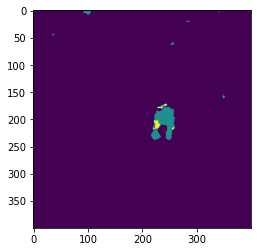

======> predicted mask of DJI_20211017111122_0003_Z_MP4_12.png saved! (Counting [1]/43)


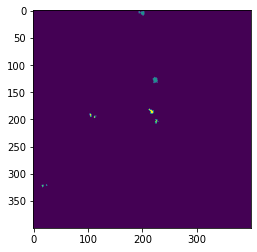

======> predicted mask of DJI_20211017111122_0003_Z_MP4_27.png saved! (Counting [2]/43)


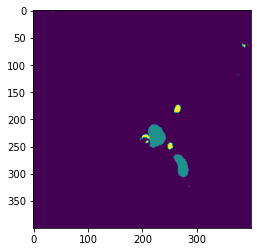

======> predicted mask of DJI_20211017111122_0003_Z_MP4_10.png saved! (Counting [3]/43)


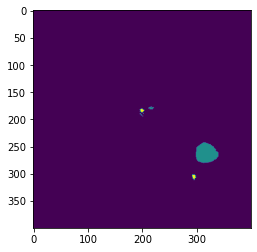

======> predicted mask of DJI_20211017111122_0003_Z_MP4_3.png saved! (Counting [4]/43)


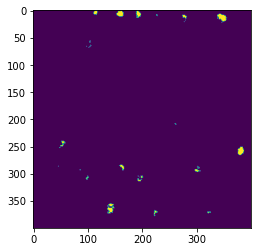

======> predicted mask of DJI_20211017111122_0003_Z_MP4_32.png saved! (Counting [5]/43)


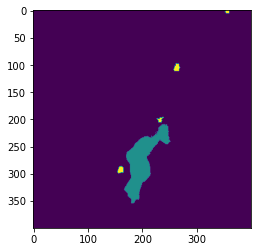

======> predicted mask of DJI_20211017111122_0003_Z_MP4_14.png saved! (Counting [6]/43)


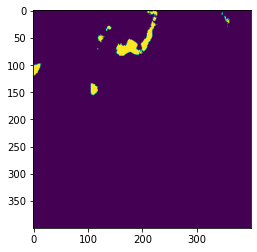

======> predicted mask of DJI_20211017111122_0003_Z_MP4_40.png saved! (Counting [7]/43)


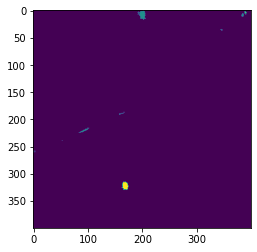

======> predicted mask of DJI_20211017111122_0003_Z_MP4_36.png saved! (Counting [8]/43)


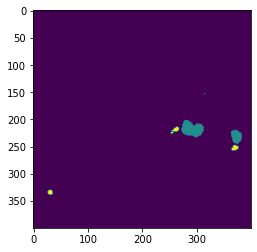

======> predicted mask of DJI_20211017111122_0003_Z_MP4_8.png saved! (Counting [9]/43)


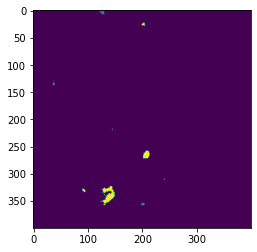

======> predicted mask of DJI_20211017111122_0003_Z_MP4_11.png saved! (Counting [10]/43)


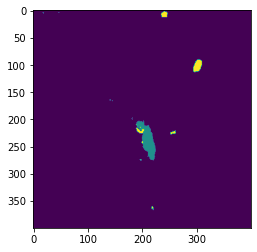

======> predicted mask of DJI_20211017111122_0003_Z_MP4_25.png saved! (Counting [11]/43)


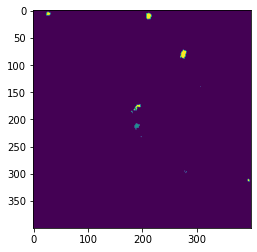

======> predicted mask of DJI_20211017111122_0003_Z_MP4_22.png saved! (Counting [12]/43)


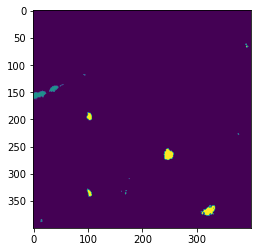

======> predicted mask of DJI_20211017111122_0003_Z_MP4_37.png saved! (Counting [13]/43)


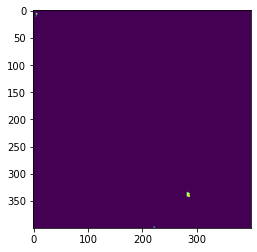

======> predicted mask of DJI_20211017111122_0003_Z_MP4_31.png saved! (Counting [14]/43)


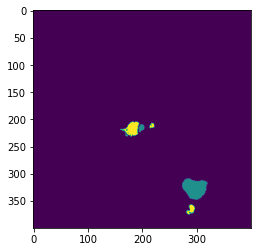

======> predicted mask of DJI_20211017111122_0003_Z_MP4_6.png saved! (Counting [15]/43)


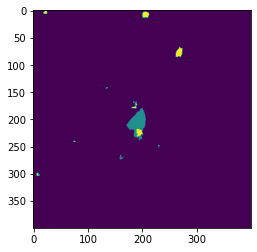

======> predicted mask of DJI_20211017111122_0003_Z_MP4_23.png saved! (Counting [16]/43)


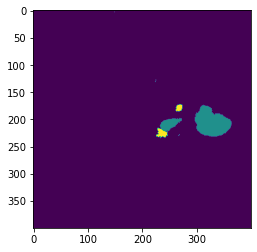

======> predicted mask of DJI_20211017111122_0003_Z_MP4_0.png saved! (Counting [17]/43)


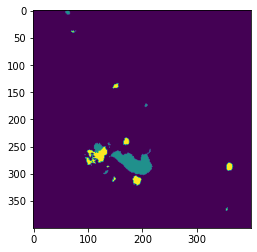

======> predicted mask of DJI_20211017111122_0003_Z_MP4_20.png saved! (Counting [18]/43)


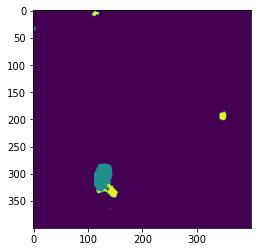

======> predicted mask of DJI_20211017111122_0003_Z_MP4_38.png saved! (Counting [19]/43)


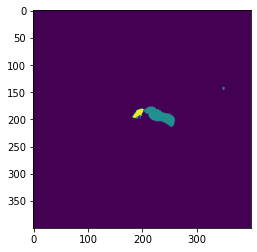

======> predicted mask of DJI_20211017111122_0003_Z_MP4_2.png saved! (Counting [20]/43)


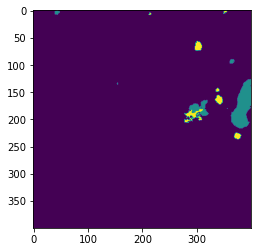

======> predicted mask of DJI_20211017111122_0003_Z_MP4_19.png saved! (Counting [21]/43)


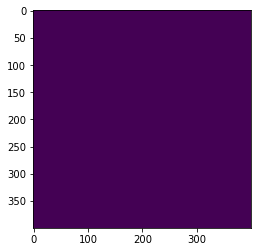

======> predicted mask of DJI_20211017111122_0003_Z_MP4_34.png saved! (Counting [22]/43)


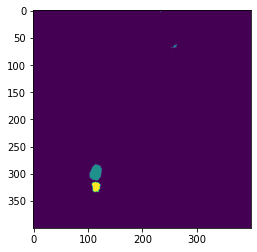

======> predicted mask of DJI_20211017111122_0003_Z_MP4_28.png saved! (Counting [23]/43)


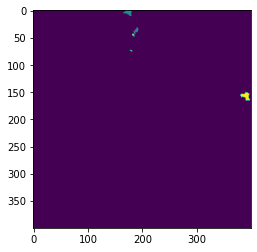

======> predicted mask of DJI_20211017111122_0003_Z_MP4_29.png saved! (Counting [24]/43)


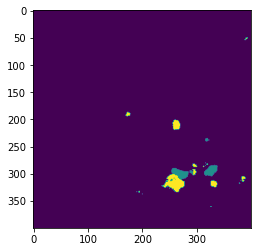

======> predicted mask of DJI_20211017111122_0003_Z_MP4_17.png saved! (Counting [25]/43)


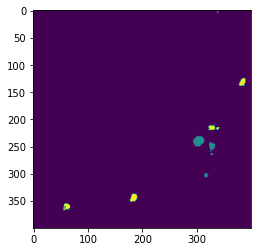

======> predicted mask of DJI_20211017111122_0003_Z_MP4_13.png saved! (Counting [26]/43)


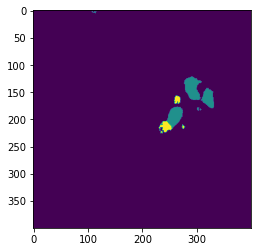

======> predicted mask of DJI_20211017111122_0003_Z_MP4_1.png saved! (Counting [27]/43)


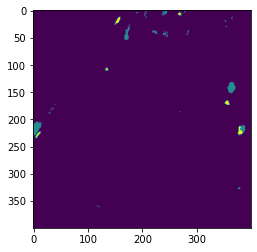

======> predicted mask of DJI_20211017111122_0003_Z_MP4_33.png saved! (Counting [28]/43)


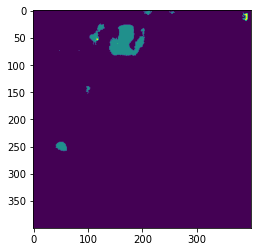

======> predicted mask of DJI_20211017111122_0003_Z_MP4_42.png saved! (Counting [29]/43)


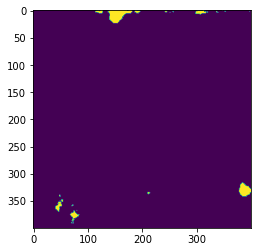

======> predicted mask of DJI_20211017111122_0003_Z_MP4_39.png saved! (Counting [30]/43)


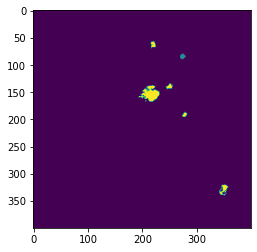

======> predicted mask of DJI_20211017111122_0003_Z_MP4_16.png saved! (Counting [31]/43)


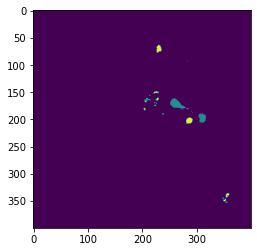

======> predicted mask of DJI_20211017111122_0003_Z_MP4_15.png saved! (Counting [32]/43)


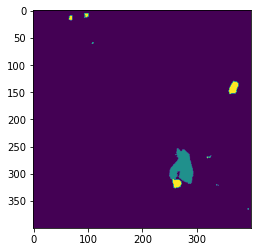

======> predicted mask of DJI_20211017111122_0003_Z_MP4_26.png saved! (Counting [33]/43)


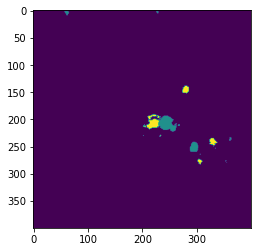

======> predicted mask of DJI_20211017111122_0003_Z_MP4_9.png saved! (Counting [34]/43)


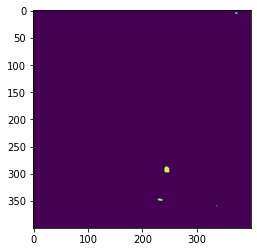

======> predicted mask of DJI_20211017111122_0003_Z_MP4_4.png saved! (Counting [35]/43)


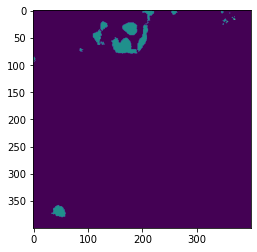

======> predicted mask of DJI_20211017111122_0003_Z_MP4_41.png saved! (Counting [36]/43)


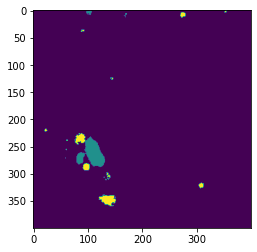

======> predicted mask of DJI_20211017111122_0003_Z_MP4_21.png saved! (Counting [37]/43)


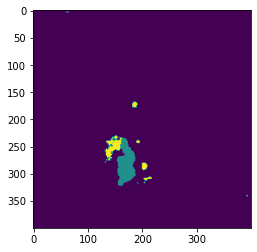

======> predicted mask of DJI_20211017111122_0003_Z_MP4_7.png saved! (Counting [38]/43)


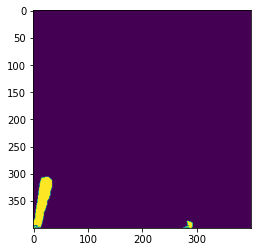

======> predicted mask of DJI_20211017111122_0003_Z_MP4_35.png saved! (Counting [39]/43)


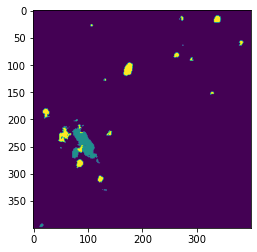

======> predicted mask of DJI_20211017111122_0003_Z_MP4_24.png saved! (Counting [40]/43)


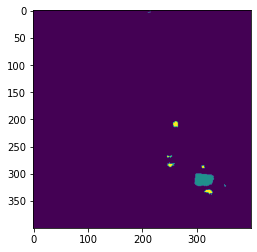

======> predicted mask of DJI_20211017111122_0003_Z_MP4_5.png saved! (Counting [41]/43)


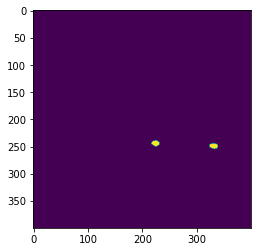

======> predicted mask of DJI_20211017111122_0003_Z_MP4_30.png saved! (Counting [42]/43)


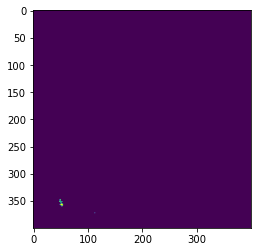

======> predicted mask of DJI_20211017111122_0003_Z_MP4_18.png saved! (Counting [43]/43)

======> Mission accomplished!!!


In [33]:
# process the images one by one with a 'for loop'
from tqdm import tqdm

i = 0
for test_fname in test_fnames:
    # load
    test_pilimgimg = Image.open(test_fname).resize((960, 770))
    test_pilimg = PILImage(test_pilimgimg)

    # predict
    test_pred_torch_all = learn.predict(test_pilimg)
    test_pred_torch= test_pred_torch_all[0]
    plt.imshow(test_pred_torch)
    plt.show()

    # convert
    test_pred_int64 = test_pred_torch.numpy() * 255 # torch.int64 --> np.int64
    test_pred_float64 = np.asarray(test_pred_int64, dtype = np.float64, order ='C') # np.int64 --> np.float64
    test_pred_pil = Image.fromarray(test_pred_float64).resize((960, 770)).convert('RGB')
#     test_pred_pil.show()
    # save
    test_pred_pil.save(f'{test_pred_path}/predmask_{test_fname.name}', 'PNG')
    
    # count
    count = []
    i += 1
    count.append(i)
    print(f'======> predicted mask of {test_fname.name} saved! (Counting {count}/{total_number})')
    

print('\n======> Mission accomplished!!!')

In [ ]:
# process the images in smaller size
# get the testing time


now = datetime.now()
date_time = now.strftime('%Y%m%d%H%M') # Y for year, m for month, d for day, H for hour, M for minute, S for second
print(f'======> The time: {date_time}')

# build the folder to store predicted masks


test_pred_path = pathlib.Path(f"/home/qiaolinhan/dev/giao/datasets/bounding/pred_{date_time}" )
test_pred_path.mkdir(parents=True, exist_ok=True)

print(f'======> created the folder: {test_pred_path}')

i = 0
for test_fname in test_fnames:
    # load
    test_pilimgimg = Image.open(test_fname).resize((960, 770))
    test_pilimg = PILImage(test_pilimgimg)

    # predict
    test_pred_torch_all = learn.predict(test_pilimg)
    test_pred_torch= test_pred_torch_all[0]
    plt.imshow(test_pred_torch)
    plt.show()

    # convert
    test_pred_int64 = test_pred_torch[i].numpy() * 255 # torch.int64 --> np.int64
    test_pred_float64 = np.asarray(test_pred_int64, dtype = np.float64, order ='C') # np.int64 --> np.float64
    test_pred_pil = Image.fromarray(test_pred_float64).resize((960, 770)).convert('RGB')
#     test_pred_pil.show()
    # save
    test_pred_pil.save(f'{test_pred_path}/predmask_{test_fname.name}', 'PNG')
    
    # count
    count = []
    i += 1
    count.append(i)
    print(f'======> predicted mask of {test_fname.name} saved! (Counting {count}/{total_number})')
    

print('\n======> Mission accomplished!!!')
